作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)

## 导入依赖

In [1]:
import numpy as np
import cv2
import open3d as o3d
import mediapipe as mp
from matplotlib import pyplot as plt

# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import *

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55


## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

astra配置文件夹路径: ../astra-config/config/
初始化视频流:  color
UVC 相机设备号: 0
检测到产品型号为: Astra Pro
初始化UVC视频流


## 创建人体分割模型

In [3]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(
    model_selection=1) 

## 采集图像

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


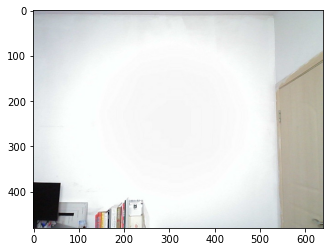

In [4]:
# 采集图像
# 注: 前几帧图像质量不好，可以多采集几次  
# 另外确保画面中有手
img_bgr = camera.read_color_img()
# 为了获取正确的左右手判断，将图像镜像
img_bgr = cv2.flip(img_bgr, 1)

# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [5]:
img_bgr = cv2.imread("taiji.png")

In [6]:
# cv2.imwrite("taiji.png", img_bgr)

## 人体分割

In [7]:
# 为了提高性能， 将图像标记为只读模式
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb.flags.writeable = False
# 手掌关键点检测
results = selfie_segmentation.process(img_rgb)

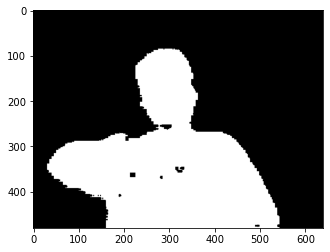

In [8]:
# 获取人的Mask
human_mask = np.uint8(results.segmentation_mask) * 255
plt.imshow(human_mask, cmap="gray")

In [9]:
# cv2.imwrite("human_mask_01.png", human_mask)

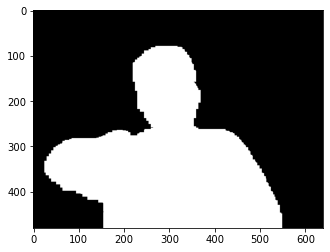

In [10]:
# 数学形态学运算 
# 创建 核
kernel = np.ones((13,13), np.uint8)
# 膨胀
human_mask = cv2.dilate(human_mask, kernel, iterations=1)
plt.imshow(human_mask, cmap="gray")

In [11]:
# cv2.imwrite("human_mask_02.png", human_mask)

## 人像扣图

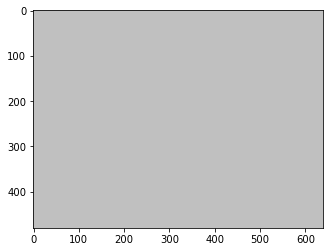

In [12]:
# 创建纯色背景图片
# 注: 你也可以替换为其他的相同尺寸的背景图
bg_image = np.zeros(img_bgr.shape, dtype=np.uint8)
bg_image[:] = [192, 192, 192]

plt.imshow(bg_image[:, :, ::-1])

In [13]:
# cv2.imwrite("background.png", bg_image)

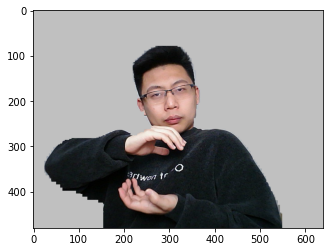

In [16]:
# 抠图
human_mask_ch3 = cv2.cvtColor(human_mask, cv2.COLOR_GRAY2BGR)
img_out = np.where(human_mask_ch3, img_bgr, bg_image)

plt.imshow(img_out[:, :, ::-1])

In [15]:
cv2.imwrite("human_with_background.png", img_out)

True